In [1]:
# 라이브러리
import ParsingNote as pn
import matplotlib.pyplot as plot
from scipy.io import wavfile
from pydub import AudioSegment

# file list 받기용
from os import listdir
from os.path import isfile, join

# print clear용
from IPython.display import clear_output

D:\Develop\Anaconda3\envs\keras_gpu\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [9]:
note_path = "./Note/Himitsu_no_Door_kara_Ai_ni_Kite_Note.txt"
    
parsing_note = pn.ParsingNoteFile(note_path)

num = 0
for note in parsing_note:
    num += 1
    print("Timing: ", note, " Label: ", parsing_note[note])
print("num : ", num)

Timing:  0002  Label:  BC
Timing:  0003  Label:  AD
Timing:  0007  Label:  AB
Timing:  0008  Label:  C
Timing:  0010  Label:  B
Timing:  0011  Label:  C
Timing:  0013  Label:  B
Timing:  0015  Label:  C
Timing:  0016  Label:  B
Timing:  0018  Label:  D
Timing:  0020  Label:  AC
Timing:  0021  Label:  B
Timing:  0023  Label:  C
Timing:  0024  Label:  A
Timing:  0026  Label:  C
Timing:  0028  Label:  B
Timing:  0029  Label:  C
Timing:  0031  Label:  B
Timing:  0033  Label:  CD
Timing:  0034  Label:  A
Timing:  0036  Label:  C
Timing:  0038  Label:  A
Timing:  0039  Label:  C
Timing:  0041  Label:  B
Timing:  0042  Label:  D
Timing:  0044  Label:  B
Timing:  0046  Label:  AD
Timing:  0047  Label:  B
Timing:  0049  Label:  C
Timing:  0051  Label:  AB
Timing:  0052  Label:  C
Timing:  0054  Label:  B
Timing:  0055  Label:  D
Timing:  0057  Label:  B
Timing:  0058  Label:  C
Timing:  0059  Label:  AD
Timing:  0062  Label:  CD
Timing:  0065  Label:  AB
Timing:  0068  Label:  AD
Timing:  0072 

In [5]:
# Spectrogram image 만드는 함수
def save_spectrogram(fil_name, sample_rate, audio, size):
    #plot 초기화
    fig,ax = plot.subplots(1)
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    
    #크기설정
    fig.set_figheight(size)
    fig.set_figwidth(size)
    
    #Axis 끄기 및 spectrogram 생성
    ax.axis('off')
    pxx, freqs, bins, im = ax.specgram(x=audio, Fs=sample_rate, noverlap=384, NFFT=512)
    ax.axis('off')
    
    #저장
    fig.savefig(fil_name, dpi=100, frameon='false')
    
# Stereo to Mono
def StereoToMono(audio_path, output_name):
    temp_audio_path = "./TempAudio/" + output_name + ".wav"
    temp_audio = AudioSegment.from_wav(audio_path)
    temp_audio = temp_audio.set_channels(1)
    temp_audio.export(temp_audio_path, format="wav")
    return temp_audio_path

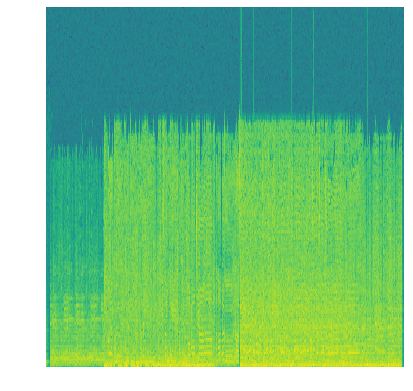

In [9]:
# Stereo to Mono
mono_path = StereoToMono("./Audio/StayAlive.wav", "temp_audio")

# sample_rate, data 읽기
sample_rate, audio_data = wavfile.read(mono_path)

save_spectrogram("./TempAudio/temp_graph.jpg", sample_rate, audio_data, 5)